# Model Evaluation of Hangman API

## Test Accuracy on Full Dictionary

In [1]:
import numpy
from dnn_model import HangmanAPI

n_tests = 1
results = list()

hangman = HangmanAPI(train_dict_src='words_250000_train.txt', model_weights_src='model_weights.h5')
for n in range(n_tests):

    print(f"""{n+1}/{n_tests}""")
    if 'WIN' == hangman.start_game(verbose=True):
        results.append(1)
    else:
        results.append(0)

results = numpy.array(results)
m = results.mean()
std = numpy.sqrt(m*(1-m)/n_tests)
print(f"""95% confidence: {round(m * 100, 2)}% +/- 2x{round(std * 100, 2)}%""")


--- loaded model weights from model_weights.h5

1/1
--- Game Starts: 6 tries remain, word is 'stembud', masked_word is '_______'
	guessed e, masked_word is now __e____, 6 tries remain(s), guessed letters are ['e']
	guessed a, masked_word is now __e____, 5 tries remain(s), guessed letters are ['e', 'a']
	guessed n, masked_word is now __e____, 4 tries remain(s), guessed letters are ['e', 'a', 'n']
	guessed o, masked_word is now __e____, 3 tries remain(s), guessed letters are ['e', 'a', 'n', 'o']
	guessed r, masked_word is now __e____, 2 tries remain(s), guessed letters are ['e', 'a', 'n', 'o', 'r']
	guessed s, masked_word is now s_e____, 2 tries remain(s), guessed letters are ['e', 'a', 'n', 'o', 'r', 's']
	guessed l, masked_word is now s_e____, 1 tries remain(s), guessed letters are ['e', 'a', 'n', 'o', 'r', 's', 'l']
	guessed t, masked_word is now ste____, 1 tries remain(s), guessed letters are ['e', 'a', 'n', 'o', 'r', 's', 'l', 't']
	guessed i, masked_word is now ste____, 0 tries re

## Load Train Data

In [2]:
import numpy
import os
import random

curr_dir = os.path.dirname(os.getcwd())
data_dir = os.path.join(os.path.join(os.path.join(curr_dir, 'hangmanAPI'), 'train_data'), 'epoch2_shuffled_samples')

files = [f for f in os.listdir(data_dir) if 'encoded' in f]
# random.shuffle(files)
data_files = [os.path.join(data_dir, x) for x in files]
print(len(data_files))

data = list()
for f in data_files:
    data.append(numpy.loadtxt(f, delimiter=','))
X = numpy.vstack(data)
X1 = X[:, :29]
X2 = X[:, 29:55]
y = X[:, 55:]
print(X1.shape, X2.shape, y.shape)

114
(2700305, 29) (2700305, 26) (2700305, 26)


## Evaluate Current Model Weights

In [3]:
from dnn_model import DNNModel

trained_model = DNNModel('words_250000_train.txt', model_weights_src='model_weights.h5', verbose=False).model
scores = trained_model.evaluate([X1, X2], y, batch_size=100)
print("%s: %.2f%%" % (trained_model.metrics_names[1], scores[1]*100))


--- loaded model weights from model_weights.h5

27004/27004 [==============================] - 176s 6ms/step - loss: 2.5874 - accuracy: 0.1639
accuracy: 16.39%


## Cross Validation of the DNN Model

- Brownlee: Deep Learning with Python 2ed., Chapter 8: Evaluate the Performance of Deep Learning Models

### CV by Automatic Verification Dataset

- model.fit(X, y, validation_split=0.33, epochs=10, batch_size=100) 


--- model weights not loaded

Epoch 1/10
18093/18093 [==============================] - 586s 32ms/step - loss: 2.6933 - accuracy: 0.1407 - val_loss: 2.6283 - val_accuracy: 0.1686
Epoch 2/10
18093/18093 [==============================] - 502s 28ms/step - loss: 2.6015 - accuracy: 0.1648 - val_loss: 2.5853 - val_accuracy: 0.1658
Epoch 3/10
18093/18093 [==============================] - 527s 29ms/step - loss: 2.5699 - accuracy: 0.1751 - val_loss: 2.5678 - val_accuracy: 0.1635
Epoch 4/10
18093/18093 [==============================] - 527s 29ms/step - loss: 2.5538 - accuracy: 0.1784 - val_loss: 2.5516 - val_accuracy: 0.1648
Epoch 5/10
18093/18093 [==============================] - 495s 27ms/step - loss: 2.5436 - accuracy: 0.1809 - val_loss: 2.5415 - val_accuracy: 0.1593
Epoch 6/10
18093/18093 [==============================] - 492s 27ms/step - loss: 2.5364 - accuracy: 0.1827 - val_loss: 2.5372 - val_accuracy: 0.1635
Epoch 7/10
18093/18093 [==============================] - 469s 26ms/step - 

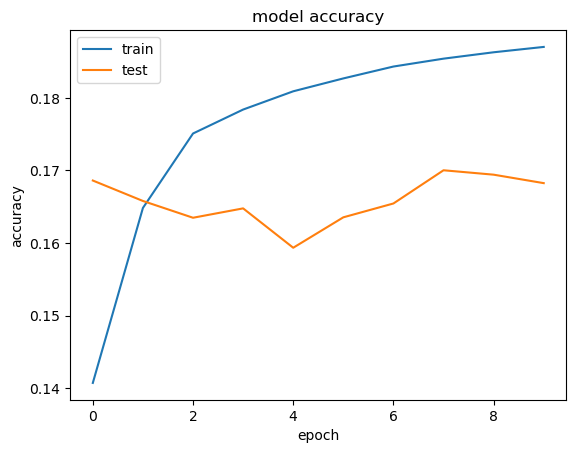

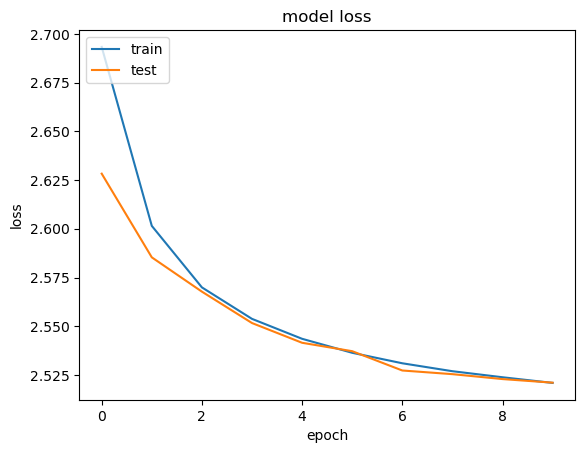

In [4]:
from dnn_model import DNNModel

model = DNNModel('words_250000_train.txt', model_weights_src=None, verbose=False).model

# shuffle is default to be True: https://keras.io/api/models/model_training_apis/#fit-method
history = model.fit([X1, X2], y, validation_split=0.33, epochs=10, batch_size=100, shuffle=False, verbose=1)

print(history.history.keys())

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### CV by Manual Verification Dataset

- model.fit([X1_train, X2_train], y_train, validation_data=([X1_test, X2_test], y_test), epochs=10, batch_size=100)

In [5]:
from sklearn.model_selection import train_test_split

seed = 7
numpy.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X1_train = X_train[:, :29]
X2_train = X_train[:, 29:55]
X1_test = X_test[:, :29]
X2_test = X_test[:, 29:55]
print(X1_train.shape, X2_train.shape, X1_test.shape, X2_test.shape)

(1809204, 81) (891101, 81) (1809204, 26) (891101, 26)
(1809204, 29) (1809204, 26) (891101, 29) (891101, 26)


In [6]:
model = DNNModel('words_250000_train.txt', model_weights_src=None, verbose=False).model
model.fit([X1_train, X2_train], y_train, validation_data=([X1_test, X2_test], y_test), epochs=10, batch_size=100)


--- model weights not loaded

Epoch 1/10
18093/18093 [==============================] - 482s 26ms/step - loss: 2.6337 - accuracy: 0.1537 - val_loss: 2.5592 - val_accuracy: 0.1846
Epoch 2/10
11569/18093 [==================>...........] - ETA: 2:31 - loss: 2.5617 - accuracy: 0.1742

KeyboardInterrupt: 

### CV by Manual k-Fold Cross Validation

- sklearn.model_selection.StratifiedKFold

**Error message: Sklearn StratifiedKFold: ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead**

- https://stackoverflow.com/questions/48508036/sklearn-stratifiedkfold-valueerror-supported-target-types-are-binary-mul

keras.utils.to_categorical produces a one-hot encoded class vector, i.e. the multilabel-indicator mentioned in the error message. StratifiedKFold is not designed to work with such input; from the split method docs:

    split(X, y, groups=None)

    [...]

    y : array-like, shape (n_samples,)

    The target variable for supervised learning problems. Stratification is done based on the y labels.

i.e. your y must be a 1-D array of your class labels.

In [ ]:
# from sklearn.model_selection import StratifiedKFold

# model = DNNModel('words_250000_train.txt', model_weights_src=None, verbose=False).model

# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# cvscores = []
# print(X.shape, y.shape)
# for train, test in kfold.split(X, y):
#     X1_train = X_train[train, :29]
#     X2_train = X_train[train, 29:55]
#     X1_test = X_test[test, :29]
#     X2_test = X_test[test, 29:55]
#     model.fit([X1_train, X2_train], y[train], epochs=10, batch_size=100, verbose=0)
#     scores = model.evaluate([X1_test, X2_test], y[test], verbose=0)
#     print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#     cvscores.append(scores[1]*100)
    
# print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

## Visualize Model Training History in Keras

- Brownlee: Deep Learning with Python 2ed., Chapter 17: Understand Model Behavior During Training by Plotting History

In [ ]:
import matplotlib.pyplot as plt

model = DNNModel('words_250000_train.txt', model_weights_src=None, verbose=False).model

n_epochs = 50

# shuffle is default to be True: https://keras.io/api/models/model_training_apis/#fit-method
history = model.fit([X1, X2], y, validation_split=0.33, epochs=n_epochs, batch_size=100, shuffle=False, verbose=1)

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights(f"""model_weights_{n_epochs}epochs.h5""")

# Tune Batch Size and Number of Epochs

- Brownlee: Deep Learning with Python 2ed., Chapter 14: How to Grid Search Hyperparameters for Deep Learning Models, 14.4

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

batch_size = [10, 50, 100]
epochs = [1, 2, 3, 4, 5]
param_grid = dict(batch_size=batch_size, epochs=epochs)

keras_model = KerasClassifier(model=model, verbose=0)
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3)
grid_result = grid.fit([X1,X2], y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))